<a href="https://colab.research.google.com/github/mtfaye/scarecrow.ai/blob/master/plant_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CCAI HACKATHON - PLANT VILLAGE CHALLENGE



### CNN-Detect Plant Deseases

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from fastai import *
from fastai.vision import *
from pathlib import Path
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import warnings
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directory_root = '/content/drive/My Drive/train'

### Take a look at the training dataset

In [0]:
np.random.seed(8)
bs = 64
tfms = get_transforms(flip_vert=True, max_warp=0)

data = ImageDataBunch.from_folder(directory_root, 
                                  valid_pct=0.2,
                                  train=".",
#                                   test="../test images",
                                  ds_tfms=tfms,
                                  size=224,bs=bs, 
                                  num_workers=0).normalize(imagenet_stats)

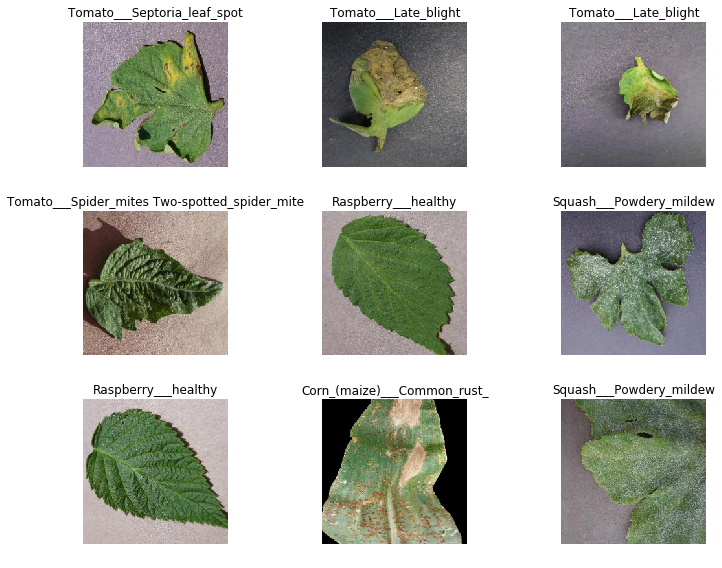

In [5]:
data.show_batch(rows=3, figsize=(10,8))

In [6]:
# List of classes on the chunk
label_list = data.classes
label_list

['Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Squash___Powdery_mildew',
 'Tomato___Late_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite']

## Training

In [7]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 39922380.31it/s]


In [8]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.244054,0.080555,0.979061,2:18:57


  ##  96% accuracy on 1 epoch, not too bad!










LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


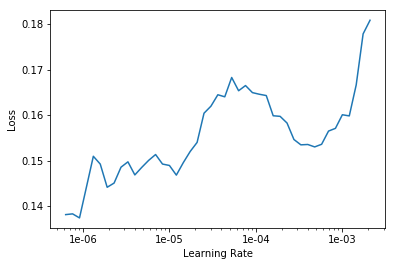

In [10]:
#Differential Learning Rates

learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

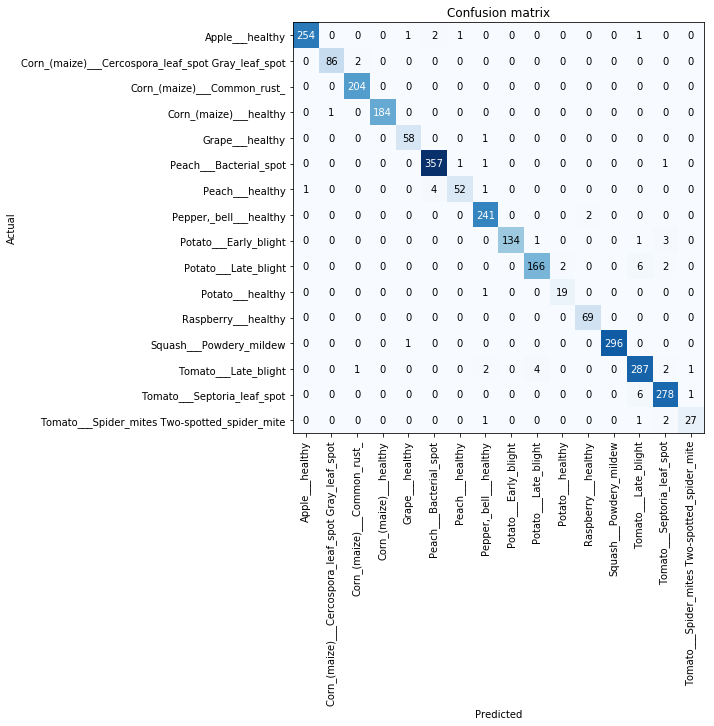

In [12]:
# Plot confusion matrix
interp.plot_confusion_matrix(figsize=(20,10))

In [0]:
# Wrong guesses
interp.plot_top_losses(8, figsize=(25,10))

In [0]:
# Save model 
learn.save('pd-detection')

## Test unlabelled images

In [0]:
# Get the test set
np.random.seed(8)
bs = 64
tfms = get_transforms(flip_vert=True, max_warp=0)

test_set = ImageDataBunch.from_folder('/content/drive/My Drive/test_imgs', 
                                  valid_pct=0.2,
                                  train=".",
                                  ds_tfms=tfms,
                                  size=224,bs=bs, 
                                  num_workers=0).normalize(imagenet_stats)

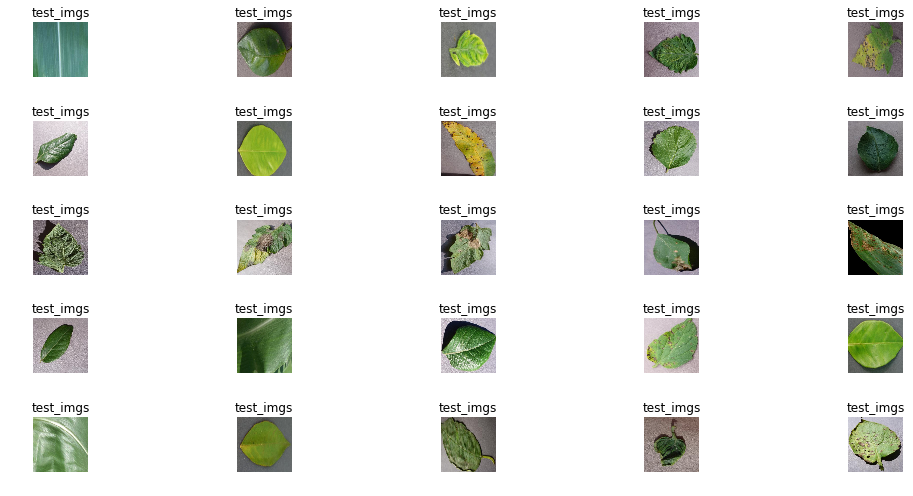

In [0]:
test_set.show_batch(row=3, figsize=(15,7))

In [0]:
path = 'drive/My Drive/train/models/pd-detection.pth'

In [0]:
model = torch.load(path)

In [0]:
learn = cnn_learner(test_set, models.resnet18).model

In [0]:
pred = learn.predict(is_test=True)

AttributeError: ignored

In [0]:

results = {}

for directory in ('test-jpg', 'test-jpg-additional'):
    test = ImageList.from_folder('test_imgs')
    learn = load_learner(path, test=test)
    preds, _ = learn.get_preds(ds_type=DatasetType.Test)
    thresh = 0.2
#     labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
#     fnames = [f.name[:-4] for f in learn.data.test_ds.items]
#     df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
#     dataframes.append(df)

NotADirectoryError: ignored